# ASSIGNMENT 3 - Model Interpretability
##  <span style="color:gray;font-family: Times New Roman"><u>Data Set - Airline Customer Satisfaction</u></span> 

### Author : Shivani Shekhawat 
### NUID : 002656554

# Abstract:

**Model Interpretability, What it is?**

Interpretability is about the extent to which a cause and effect can be observed within a system. Or to put it another way, it is the extent to which you are able to predict what is going to happen, given a change in input or algorithmic parameters. It’s being able to understand which inputs are the most predictive (i.e., impact the prediction/output the most), and anticipate how predictions will change with differing inputs.

We might think some features are most important, but the model might have considered some other features to help predict the model’s point of view. With predictions in our hand as output, we cannot understand or explain what has happened inside a machine learning model. Sometimes a model’s way of performance is questionable.  An open-source library, SHAP puts an end to this question on the reliability of a machine learning model.

**What is SHAP or SHapley Additive exPlanations?**

SHAP stands for “SHapley Additive exPlanations.” Shapley values are a widely used approach from cooperative game theory. The essence of Shapley value is to measure the contributions to the final outcome from each player separately among the coalition, while preserving the sum of contributions being equal to the final outcome. When using SHAP values in model explanation, we can measure the input features’ contribution to individual predictions.

Some benefits of using SHAP values over other techniques:


*   Global interpretability: SHAP values not only show feature importance but also show whether the feature has a positive or negative impact on predictions.
*   Local interpretability: We can calculate SHAP values for each individual prediction and know how the features contribute to that single prediction. Other techniques only show aggregated results over the whole dataset.
*   SHAP values can be used to explain a large variety of models including linear model, tree-based models and neural networks, while other techniques can only be used to explain limited model types.

In this notebook, I have used the dataset "Airlines Customer Satisfaction" to fit a linear model, a tree based model and used H2O AutoML to find the best model after which I have done SHAP analysis on the models and interpreted the SHAP values and compared them.








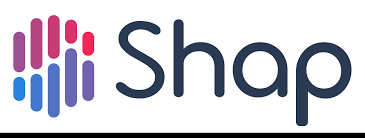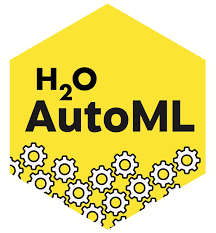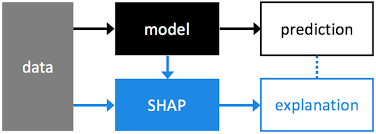

# About the data:

The data is obtained from Kaggle. It consists of 1,29,880 rows and 23 columns. The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.
It includes several categorical and numeric variables.

Features:

  1. satisfaction: **Categorical**, used for binary classification.
  2. Gender: **Categorical**
  3. Customer Type: **Categorical**
  4. Age: Numerical
  5. Type of Travel: **Categorical**
  6. Class: **Categorical**(Used for multiclass classification)
  7. Flight Distance: **Numerical**(Used for Regression)
  8. Seat comfort: **Categorical**
  9. Departure/Arrival time convenient: **Categorical**
  10. Food and drink: **Categorical**
  11. Gate location: **Numerical**
  12. Inflight wifi service: **Categorical**
  13. Inflight entertainment: **Categorical**
  14. Online support: **Categorical**
  15. Ease of Online booking: **Categorical**
  16. On-board service: **Categorical**
  17. Leg room service: **Categorical**
  18. Baggage handling: **Categorical**
  19. Checkin service: **Categorical**
  20. Cleanliness: **Categorical**
  21. Online boarding: **Categorical**
  22. Departure Delay in Minutes: **Numerical**
  23. Arrival Delay in Minutes: **Numerical**

## Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import pydot
from IPython.display import Image

# machine learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.svm import SVC, LinearSVC
from six import StringIO  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.tree import DecisionTreeClassifier,export_graphviz

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
import time

from itertools import groupby
from graphviz import Source

import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# setting seaborn theme
sns.set_theme(style='whitegrid', palette='ch:.25')

In [ ]:
# find the location of graphviz so dot.exe is in the PATH
import os
common_path = r'C:\\Program Files\\Anaconda3'
dot_path = os.path.join(common_path, 'Library', 'bin', 'graphviz')
os.environ["PATH"] += os.pathsep + dot_path

In [ ]:
def plot_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# Loading Data

In [ ]:
## Reading the dataset
arl_df = pd.read_csv('Invistico_Airline.csv')
arl_df.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [ ]:
arl_df.shape

(129880, 23)

In [ ]:
arl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
arl_df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [ ]:
Categorical_columns = arl_df.select_dtypes(include=['object'])
Numerical_columns = arl_df.select_dtypes(exclude=['object'])

In [ ]:
Numerical_columns.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

In [ ]:
Categorical_columns.describe().T

count unique              top    freq
satisfaction    129880      2        satisfied   71087
Gender          129880      2           Female   65899
Customer Type   129880      2   Loyal Customer  106100
Type of Travel  129880      2  Business travel   89693
Class           129880      3         Business   62160

All columns is Numeric expcept [ ' satisfaction ' , ' Gender ' , ' Customer Type ' , ' Type of Travel ' , ' Class ' ]

### Checking Correlation

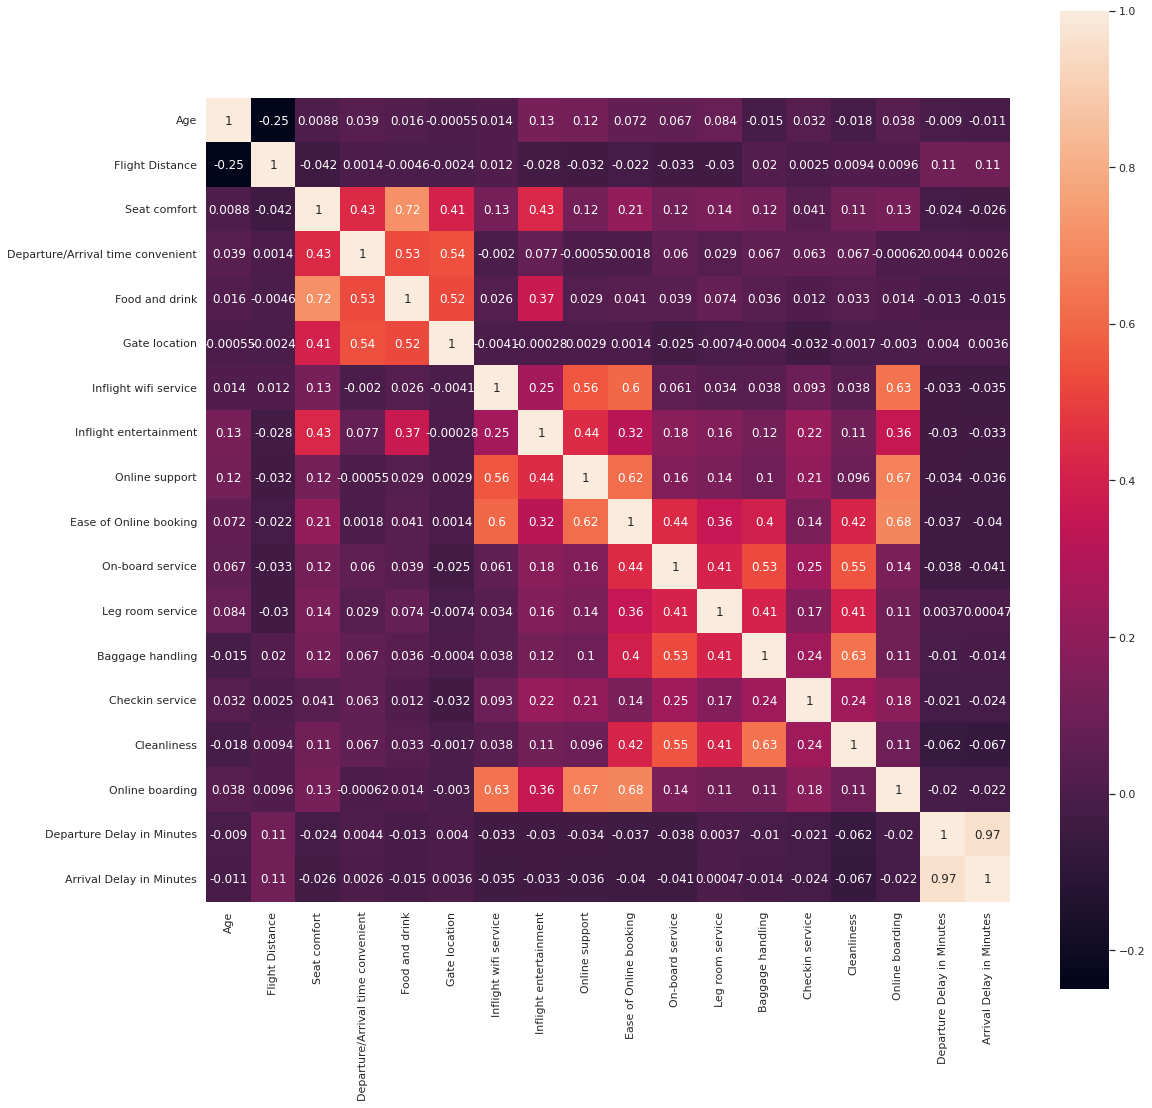

In [ ]:
correlation = arl_df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, square=True)
plt.show()

 
*   There is a significat correlation between Departure Delay in Minutes and Arrival Delay in Minutes so we will drop one of 2 freatures to avoid multicolinearity problem


In [ ]:
arl_df = arl_df.drop("Arrival Delay in Minutes",axis=1)

In [ ]:
arl_df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [ ]:
type(arl_df)

pandas.core.frame.DataFrame

## Feature Engineering

In [ ]:
x =arl_df.drop(['satisfaction'], axis = 1)

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
y = arl_df['satisfaction']

In [ ]:
y

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129875       satisfied
129876    dissatisfied
129877    dissatisfied
129878    dissatisfied
129879    dissatisfied
Name: satisfaction, Length: 129880, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=90)

## Process the Categorical Data or Dummy

In [ ]:
m=(x.dtypes == 'object')
object_col=list(m[m].index)
print('categorical variables: ')
print(object_col)

categorical variables: 
['Gender', 'Customer Type', 'Type of Travel', 'Class']


making dummies for x train

In [ ]:
for obj in object_col :
    print('unique values in ',obj,' column : ' , x_train[obj].unique())

unique values in  Gender  column :  ['Female' 'Male']
unique values in  Customer Type  column :  ['disloyal Customer' 'Loyal Customer']
unique values in  Type of Travel  column :  ['Business travel' 'Personal Travel']
unique values in  Class  column :  ['Business' 'Eco' 'Eco Plus']


In [ ]:
x_train = pd.get_dummies(x_train, columns=['Gender', 'Customer Type'
                                 , 'Type of Travel', 'Class'], drop_first=True)

creating dummies for test data

In [ ]:
x_test = pd.get_dummies(x_test, columns=['Gender', 'Customer Type'
                                 , 'Type of Travel', 'Class'], drop_first=True)

Encoding the predictor column y. y has 2 values 'satisfied' and 'dissatified'. Converting it to 0 and 1.

Doing it seperately for y_train and y_test as we have already split the data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
y_test= lb.fit_transform(y_test)

In [ ]:
y_train = lb.fit_transform(y_train)

In [ ]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [96]:
stand= StandardScaler()

Getting KDE plot for the dataframe

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

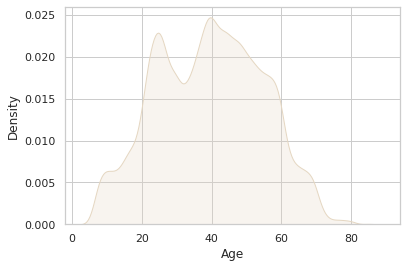

In [97]:
sns.kdeplot(x_train['Age'], shade=True)

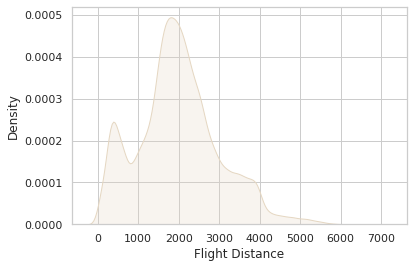

In [98]:
sns.kdeplot(x_train['Flight Distance'], shade=True)

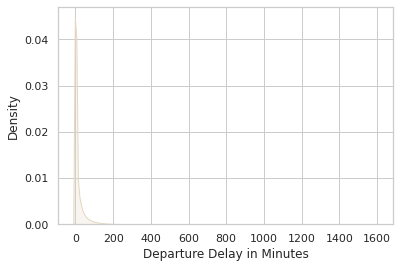

In [99]:
sns.kdeplot(x_train['Departure Delay in Minutes'], shade=True)

In [ ]:
x_train

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
59447   38             2701             4                                  4   
65614   30             4443             0                                  5   
21926   20             2060             3                                  2   
69739   56             2735             3                                  3   
53298   25             2601             3                                  3   
...    ...              ...           ...                                ...   
75075   78             2003             2                                  3   
72351   47             1725             2                                  4   
5746    45             1452             1                                  5   
35485   55              252             4                                  4   
36699   46             1762             4                                  5   

       Food and drink  Gate location  Inflight wifi service  \
59447               4              3                      5   
65614               0              3                      4   
21926               3              3                      4   
69739               3              3                      2   
53298               3              3                      5   
...               ...            ...                    ...   
75075               3              3                      2   
72351               1              4                      3   
5746                0              1                      5   
35485               4              3                      4   
36699               4              1                      3   

       Inflight entertainment  Online support  Ease of Online booking  ...  \
59447                       4               1                       5  ...   
65614                       5               5                       4  ...   
21926                       3               4                       4  ...   
69739                       5               4                       1  ...   
53298                       3               1                       5  ...   
...                       ...             ...                     ...  ...   
75075                       2               2                       2  ...   
72351                       2               4                       2  ...   
5746                        0               2                       5  ...   
35485                       5               4                       5  ...   
36699                       4               3                       3  ...   

       Baggage handling  Checkin service  Cleanliness  Online boarding  \
59447                 3                3            4                5   
65614                 5                5            5                4   
21926                 2                4            3                4   
69739                 1                4            1                4   
53298                 3                4            2                5   
...                 ...              ...          ...              ...   
75075                 4                1            4                2   
72351                 2                2            2                3   
5746                  4                3            5                5   
35485                 5                5            5                5   
36699                 5                3            5                3   

       Departure Delay in Minutes  Gender_Male  \
59447                           0            0   
65614                           0            1   
21926                          18            1   
69739                           0            0   
53298                          30            1   
...                           ...          ...   
75075                           0            1   
72351                           3            0   
5746         

Doing fit transform for both train and test set seperately

In [ ]:
for column in ['Age','Flight Distance','Departure Delay in Minutes']:
   x_train[column] = stand.fit_transform(x_train[column].values.reshape(-1,1))

In [ ]:
for column in ['Age','Flight Distance','Departure Delay in Minutes']:
   x_test[column] = stand.fit_transform(x_test[column].values.reshape(-1,1))

## Fitting a linear Model and Interpretting coefficients

Here we have used Logistic Regression(to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables) to predict whether the future customer will be satisfied or not.

In [ ]:
classfier = LogisticRegression(solver='liblinear', random_state=1)
classfier.fit(x_train , y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
lg= LogisticRegression(random_state=42)
lg.fit(x_train , y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

Accuracy = 0.8039421004003696
ROC Area under Curve = 0.800383954922981
Time taken = 2.316908359527588
              precision    recall  f1-score   support

           0    0.79864   0.76090   0.77931     14772
           1    0.80800   0.83987   0.82363     17698

    accuracy                        0.80394     32470
   macro avg    0.80332   0.80038   0.80147     32470
weighted avg    0.80374   0.80394   0.80347     32470



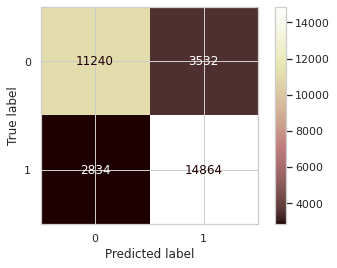

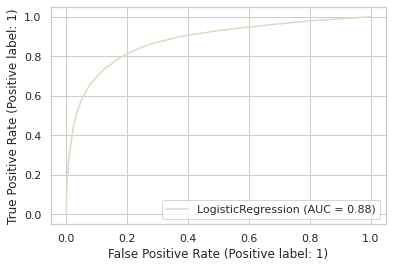

In [ ]:
t0=time.time()
model= LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred) 
time_taken5 = time.time()-t0
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print("Time taken = {}".format(time_taken5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.pink)
plot_roc_curve(model, x_test, y_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Inflight entertainment             0.689878
On-board service                   0.300553
Checkin service                    0.295304
Seat comfort                       0.284532
Leg room service                   0.233176
Ease of Online booking             0.227223
Online boarding                    0.173795
Gate location                      0.113427
Baggage handling                   0.102861
Cleanliness                        0.084172
Online support                     0.082079
Inflight wifi service             -0.070162
Age                               -0.117094
Flight Distance                   -0.121151
Departure/Arrival time convenient -0.194338
Departure Delay in Minutes        -0.196747
Food and drink                    -0.214764
Class_Eco                         -0.744160
Type of Travel_Personal Travel    -0.764922
Class_Eco Plus                    -0.817364
Gender_Male                       -0.968801
Customer Type_disloyal Customer   -1.965323

In [ ]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             x_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Inflight entertainment             1.993473
On-board service                   1.350605
Checkin service                    1.343535
Seat comfort                       1.329139
Leg room service                   1.262604
Ease of Online booking             1.255109
Online boarding                    1.189812
Gate location                      1.120110
Baggage handling                   1.108338
Cleanliness                        1.087816
Online support                     1.085542
Inflight wifi service              0.932243
Age                                0.889501
Flight Distance                    0.885900
Departure/Arrival time convenient  0.823380
Departure Delay in Minutes         0.821399
Food and drink                     0.806732
Class_Eco                          0.475133
Type of Travel_Personal Travel     0.465370
Class_Eco Plus                     0.441594
Gender_Male                        0.379538
Customer Type_disloyal Customer    0.140111

# Fitting a Tree model

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking.

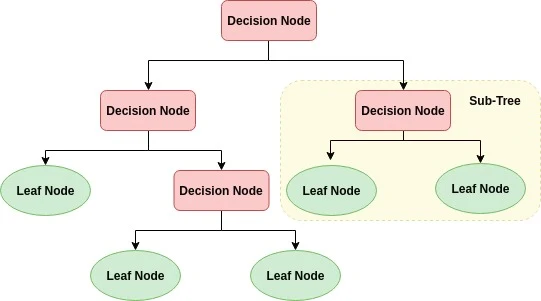

**criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [ ]:
X = pd.get_dummies(arl_df[arl_df.columns.difference(['satisfaction'])], drop_first=True)
y = pd.get_dummies(arl_df.satisfaction, drop_first=True)
clf = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01)

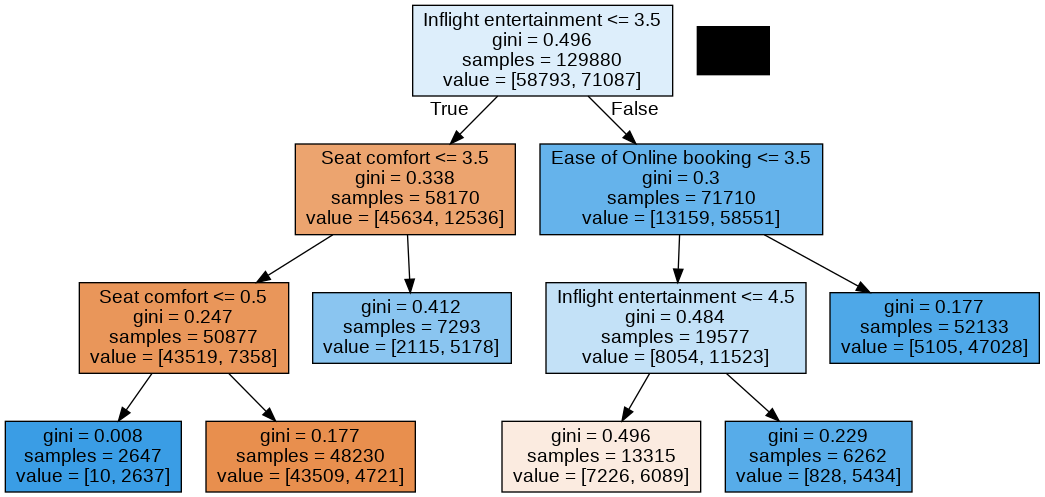

In [ ]:
# unpruned tree
graph, = plot_tree(clf, X.columns)
s = Source(graph, filename="test.gv", format="png")
Image(s.view())

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
accuracy_score(y_test,y_pred)*100

83.40622112719433

In [ ]:
roc_auc_score(y_test,y_pred)*100

80.0383954922981

# AutoML

**AutoML(Automated Machine Learning)** is the process of automating the time-consuming, iterative tasks of machine learning model development. It allows data scientists, analysts, and developers to build ML models with high scale, efficiency, and productivity all while sustaining model quality. 

In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size_GB = 200, nthreads = 10)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         1 hour 9 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_unknownUser_6ecx6g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    200.0 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.15 final
--------------------------  ----------------------------------

In [ ]:
data = h2o.H2OFrame(arl_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.shape

(129880, 22)

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [ ]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

90985
19388
19507


In [ ]:
y = 'satisfaction'
x = list(data.columns)

In [ ]:
x

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes']

In [ ]:
target=y
#data=h2o.deep_copy(df, 'data')
#data=h2o.deep_copy(data, 'df')

splits = data.split_frame(ratios=[0.75], seed=1)  

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 97429
Rows in Test 32451


In [ ]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

In [ ]:
# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_3_20221206_00837


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    97                 97                          463762                 15           15           15            253           470           376.216

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.016570589051002726
RMSE: 0.12872680004957293
LogLoss: 0.06038626911076989
Mean Per-Class Error: 0.02067874031176933
AUC: 0.9985924178375498
AUCPR: 0.9988709782547038
Gini: 0.9971848356750996

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4293703739883928
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  ----------------
dissatisfied  40112           945          0.023    (945.0/41057.0)
satisfied     913             48867        0.0183   (913.0/49780.0)
Total         41025           49812        0.0205   (1858.0/90837.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.42937      0.981344  201
max f2                       0.2968       0.98639   243
max f0point5                 0.632054     0.987308  144
max accuracy                 0.42937      0.979546  201
max precision                0.999698     1         0
max recall                   0.042161     1         353
max specificity              0.999698     1         0
max absolute_mcc             0.42937      0.958708  201
max min_per_class_accuracy   0.449896     0.979389  195
max mean_per_class_accuracy  0.470507     0.979583  188
max tns                      0.999698     41057     0
max fns                      0.999698     43581     0
max fps                      0.000547047  41057     399
max tps                      0.042161     49780     353
max tnr                      0.999698     1         0
max fnr                      0.999698     0.875472  0
max fpr                      0.000547047  1         399
max tpr                      0.042161     1         353

Gains/Lift Table: Avg response rate: 54.80 %, avg score: 54.79 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100069                   0.999795           1.82477    1.82477            1                0.999826     1                           0.999826            0.0182603       0.0182603                  82.4769   82.4769            0.0182603
2        0.0200029                   0.999761           1.82477    1.82477            1                0.999777     1                           0.999802            0.0182403       0.0365006                  82.4769   82.4769            0.0365006
3        0.0300098                   0.999733           1.82477    1.82477            1                0.999747     1                           0.999784            0.0182603       0.0547609                  82.4769   82.4769            0.0547609
4        0.0400057                   0.999708           1.82477    1.82477            1                0.99972      1                           0.999768            0.0182403       0.0730012                  82.4769   82.4769            0.0730012

In [ ]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_1_AutoML_3_20221206_00837                           0.994346  0.0945764  0.995737               0.0379797  0.168902  0.0285279
StackedEnsemble_BestOfFamily_1_AutoML_3_20221206_00837  0.994308  0.0939351  0.995708               0.037941   0.169344  0.0286775
XGBoost_1_AutoML_3_20221206_00837                       0.993009  0.104868   0.994756               0.0430593  0.179013  0.0320457
XGBoost_2_AutoML_3_20221206_00837                       0.982748  0.489144   0.98641                0.0689935  0.387918  0.15048
GBM_3_AutoML_3_20221206_00837                           0.980932  0.510159   0.985597               0.0738271  0.401003  0.160803
GBM_2_AutoML_3_20221206_00837                           0.975654  0.517496   0.98175                0.0837827  0.405375  0.164329
DRF_1_AutoML_3_20221206_00837                           0.970747  0.728444   0.972047  

In [ ]:
# predicting on test data
prediction = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# finding and storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [ ]:
best_model.algo

'gbm'

#### The Best model is "**GBM**"

In [ ]:
best_model.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.020872446277738297
RMSE: 0.14447299497739463
LogLoss: 0.07287496278988102
Mean Per-Class Error: 0.027249586024595526
AUC: 0.9971226495693808
AUCPR: 0.9977426028503291
Gini: 0.9942452991387616

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42760552606108587
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  ---------------
dissatisfied  14342           451          0.0305   (451.0/14793.0)
satisfied     424             17234        0.024    (424.0/17658.0)
Total         14766           17685        0.027    (875.0/32451.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.427606     0.975243  200
max f2                       0.282001     0.980088  246
max f0point5                 0.639409     0.982601  142
max accuracy                 0.427606     0.973036  200
max precision                0.999656     1         0
max recall                   0.00244679   1         393
max specificity              0.999656     1         0
max absolute_mcc             0.427606     0.945642  200
max min_per_class_accuracy   0.452745     0.97293   193
max mean_per_class_accuracy  0.501907     0.973122  179
max tns                      0.999656     14793     0
max fns                      0.999656     14105     0
max fps                      0.000500906  14793     399
max tps                      0.00244679   17658     393
max tnr                      0.999656     1         0
max fnr                      0.999656     0.798788  0
max fpr                      0.000500906  1         399
max tpr                      0.00244679   1         393

Gains/Lift Table: Avg response rate: 54.41 %, avg score: 54.37 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100151                   0.999797           1.83775      1.83775            1                0.999826     1                           0.999826            0.0184053       0.0184053                  83.7751   83.7751            0.0184053
2        0.0200302                   0.999761           1.83775      1.83775            1                0.999778     1                           0.999802            0.0184053       0.0368105                  83.7751   83.7751            0.0368105
3        0.0300145                   0.999731           1.83775      1.83775            1                0.999745     1                           0.999783            0.0183486       0.0551591                  83.7751   83.7751            0.0551591
4        0.0400296                   0.999705           1.83775      1.83775            1                0.999717     1                           0.999767            0.0184053       0.0735644                  83.7751   83.7751            0.0735644
5        0.0500139                   0.999679           1.83775      1.83775            1                0.999692     1                           0.999752            0.0183486       0.091913                   83.7751   83.7751            0.091913
6        0.100028                    0.999528           1.83775      1.83775            1                0.999607     1                           0.999679            0.091913        0.183826                   83.7751   83.7751            0.183826
7        0.150011                    0.99934            1.83775      1.83775            1          

# SHAP ANALYSIS

In [ ]:
#Shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Logistic Regression

In [ ]:
import shap
pd.set_option("display.max_columns",None)
shap.initjs()
import xgboost

In [ ]:
explainer = shap.Explainer(model, x_train, feature_names=arl_df.columns)
shap_values = explainer(x_test)

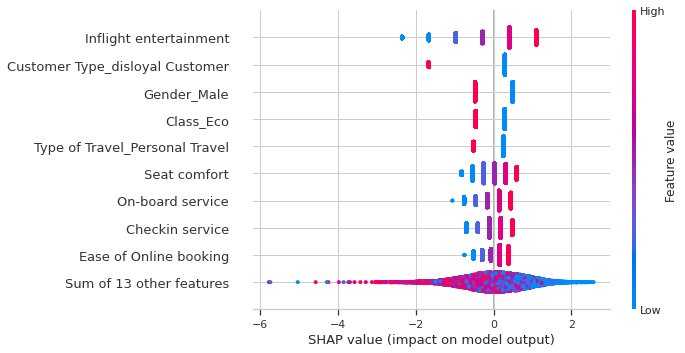

In [ ]:
shap.initjs()
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

Let’s explain the prediction for the first item in the testset.


In [ ]:
shap.initjs()
ind = 0
shap.plots.force(shap_values[ind])

The red color in the figure above represents features that have contributed positively to the prediction, i.e satisfaction, while features in blue have contributed negatively towards customer not getting satisfied.

After showing the interpretation of a single instance, the next cell can be used to plot a summary of the overall features importance of the model

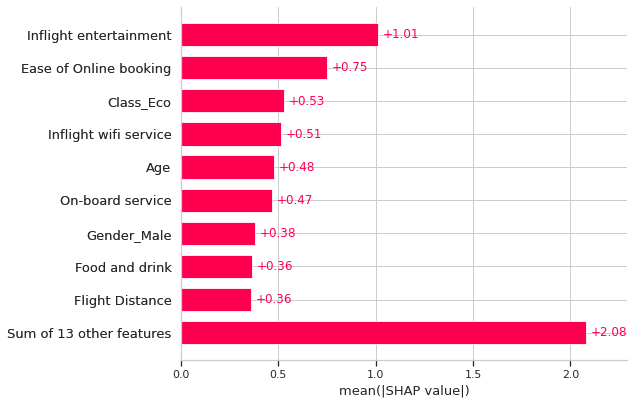

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)

shap.summary_plot() can plot the mean shap values for each class if provided with a list of shap values (the output of explainer.shap_values() for a classification problem) as below:

The output will be as below, this plot summaries the overall importance of each feature, the x-axis represents SHAP values, positive values contribute positively towards satisfaction and vice versa, the y-axis represents each feature, red color mean high values for the feature, and blue colors indicate lower values.

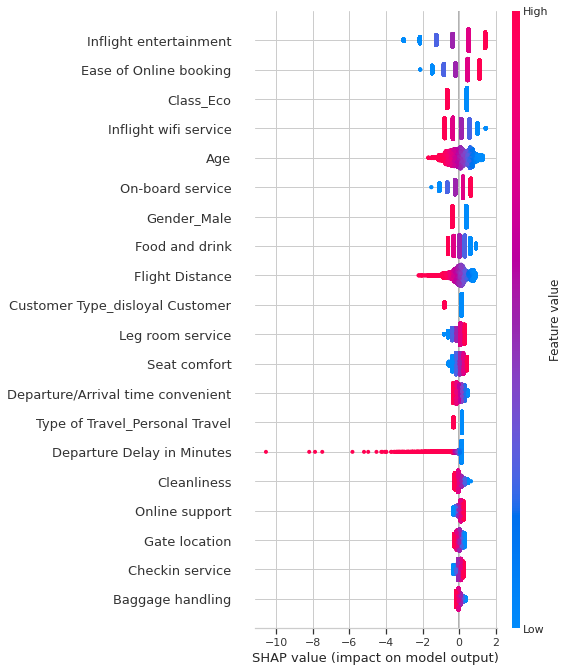

In [ ]:
shap.initjs()
shap.summary_plot(shap_values.values, x_test)

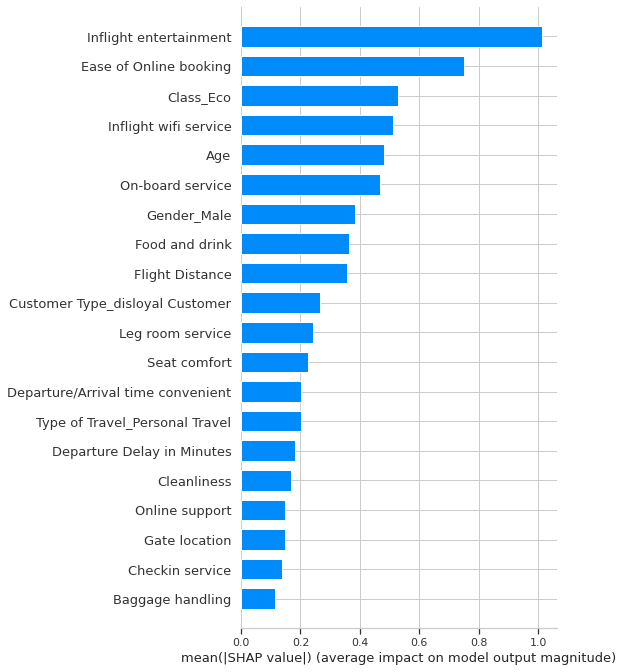

In [ ]:
shap.initjs()
shap.summary_plot(shap_values.values, x_test, plot_type='bar')

In [92]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

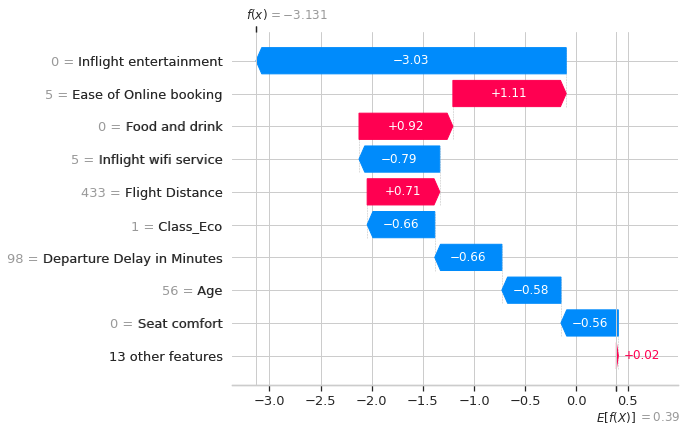

In [93]:
sample_feature_importance(0, 'waterfall')

## Tree Model

In [ ]:
x_train.loc[[74]]

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
74   49             1911             0                                  1   

    Food and drink  Gate location  Inflight wifi service  \
74               0              4                      2   

    Inflight entertainment  Online support  Ease of Online booking  ...  \
74                       0               1                       2  ...   

    Baggage handling  Checkin service  Cleanliness  Online boarding  \
74                 3                1            4                2   

    Departure Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
74                           0            1                                0   

    Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
74                               1          1               0  

[1 rows x 22 columns]

In [ ]:
# Define a tree explainer for the built model
import shap
shap.initjs()
explainer = shap.TreeExplainer(clf)
 # obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 

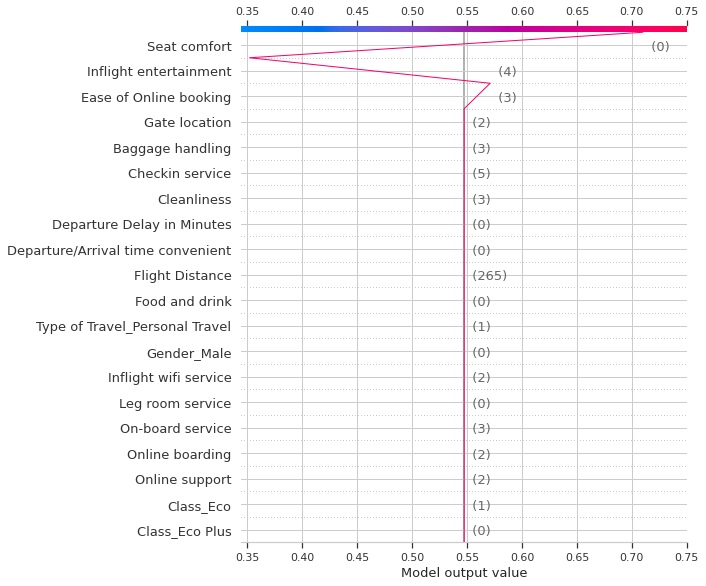

In [ ]:
shap.initjs()
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

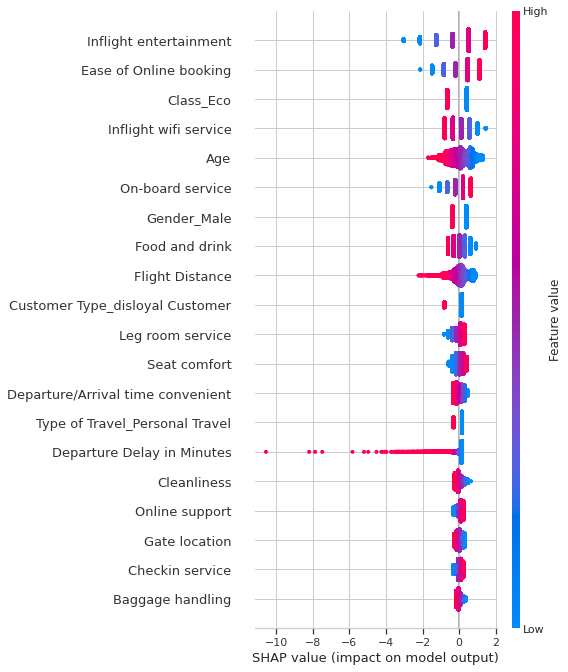

In [91]:
shap.initjs()
shap.summary_plot(shap_values.values, x_test)

## AutoML

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict      dissatisfied    satisfied
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------------  -----------
GBM_1_AutoML_3_20221206_00837                           0.997338  0.0709536  0.997925               0.0272113  0.142637  0.0203452               23262                   0.060681  GBM              satisfied     0.00125218      0.998748
StackedEnsemble_BestOfFamily_1_AutoML_3_20221206_00837  0.997306  0.0683953  0.997902               0.0267885  0.141595  0.0200492                5310                   0.045986  StackedEnsemble  satisfied     0.000623264     0.999377
XGBoost_1_AutoML_3_20221206_00837                       0.996279  0.079371   0.997133               0.0311566  0.152218  0.0231704               18482                   0.005801  XGBoost          satisfied     0.00164109      0.998359
DRF_1_AutoML_3_20221206_00837                           0.987403  0.33596    0.98766                0.041969   0.174876  0.0305815                1123                   0.002206  DRF              satisfied     0               1
XGBoost_2_AutoML_3_20221206_00837                       0.982622  0.488636   0.985632               0.067556   0.387596  0.150231                 1090                   0.000843  XGBoost          satisfied     0.35814         0.64186
GBM_3_AutoML_3_20221206_00837                           0.981558  0.509879   0.985904               0.070969   0.400817  0.160655                  940                   0.001904  GBM              satisfied     0.341893        0.658107
GBM_2_AutoML_3_20221206_00837                           0.975762  0.517625   0.981826               0.078575   0.405432  0.164375                  906                   0.003044  GBM              satisfied     0.33025         0.66975
GBM_4_AutoML_3_20221206_00837                           0.969158  0.618244   0.973271               0.0945938  0.461443  0.21293                   628                   0.001189  GBM              satisfied     0.446792        0.553208
GLM_1_AutoML_3_20221206_00837                           0.909019  0.385363   0.933296               0.166377   0.344991  0.119019                 6834                   0.001504  GLM              satisfied     0.463972        0.536028
[9 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

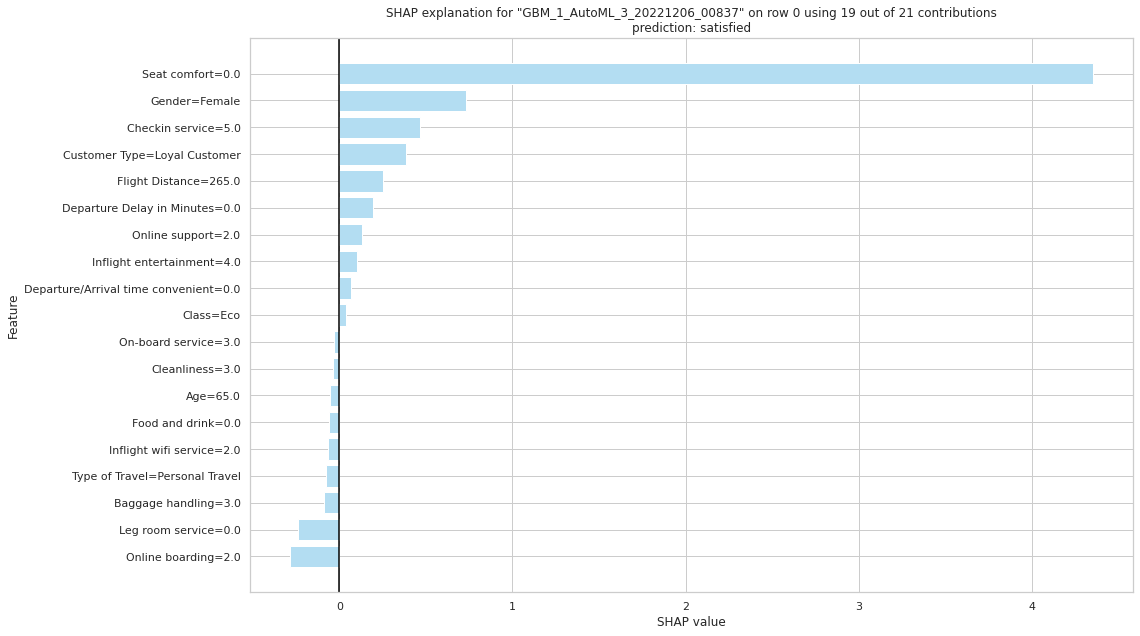

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo             predict      dissatisfied    satisfied
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------  ---------  --------------  -----------
GBM_1_AutoML_3_20221206_00837                           0.997338  0.0709536  0.997925               0.0272113  0.142637  0.0203452               23262                   0.060681  GBM              satisfied     0.00125218      0.998748
StackedEnsemble_BestOfFamily_1_AutoML_3_20221206_00837  0.997306  0.0683953  0.997902               0.0267885  0.141595  0.0200492                5310                   0.045986  StackedEnsemble  satisfied     0.000623264     0.999377
XGBoost_1_AutoML_3_20221206_00837                       0.996279  0.079371   0.997133               0.0311566  0.152218  0.0231704               18482                   0.005801  XGBoost          satisfied     0.00164109      0.998359
DRF_1_AutoML_3_20221206_00837                           0.987403  0.33596    0.98766                0.041969   0.174876  0.0305815                1123                   0.002206  DRF              satisfied     0               1
XGBoost_2_AutoML_3_20221206_00837                       0.982622  0.488636   0.985632               0.067556   0.387596  0.150231                 1090                   0.000843  XGBoost          satisfied     0.35814         0.64186
GBM_3_AutoML_3_20221206_00837                           0.981558  0.509879   0.985904               0.070969   0.400817  0.160655                  940                   0.001904  GBM              satisfied     0.341893        0.658107
GBM_2_AutoML_3_20221206_00837                           0.975762  0.517625   0.981826               0.078575   0.405432  0.164375                  906                   0.003044  GBM              satisfied     0.33025         0.66975
GBM_4_AutoML_3_20221206_00837                           0.969158  0.618244   0.973271               0.0945938  0.461443  0.21293                   628                   0.001189  GBM              satisfied     0.446792        0.553208
GLM_1_AutoML_3_20221206_00837                           0.909019  0.385363   0.933296               0.166377   0.344991  0.119019                 6834                   0.001504  GLM              satisfied     0.463972        0.536028
[9 rows x 13 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(data, row_index = 0)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_3_20221206_00837

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.436362948882846
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  -----------------
dissatisfied  57087           1706         0.029    (1706.0/58793.0)
satisfied     1806            69281        0.0254   (1806.0/71087.0)
Total         58893           70987        0.027    (3512.0/129880.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

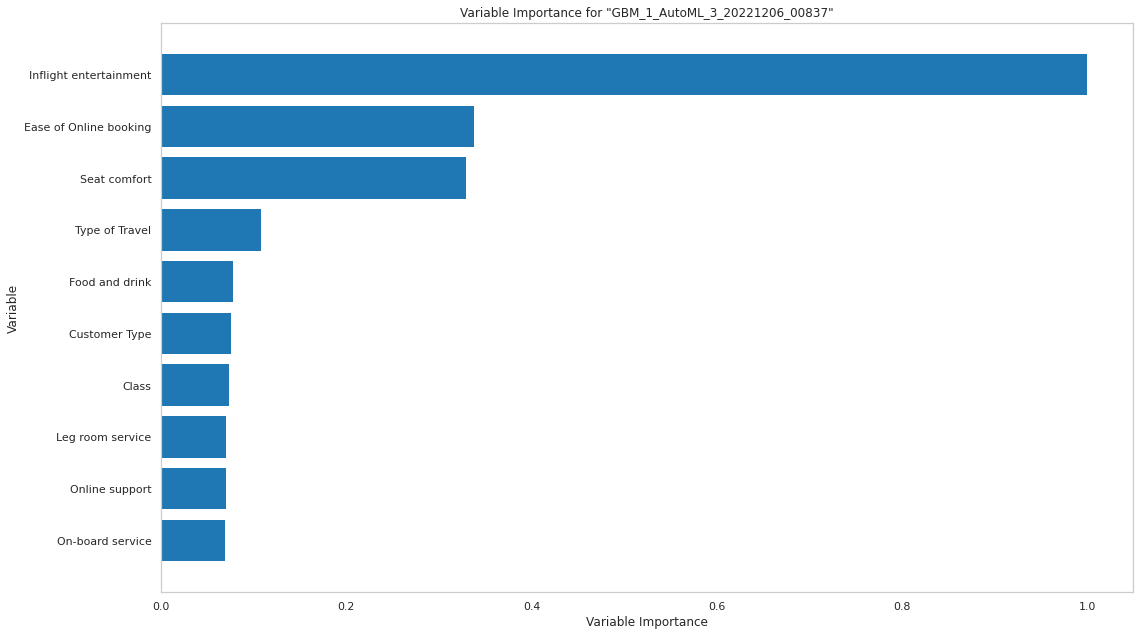

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

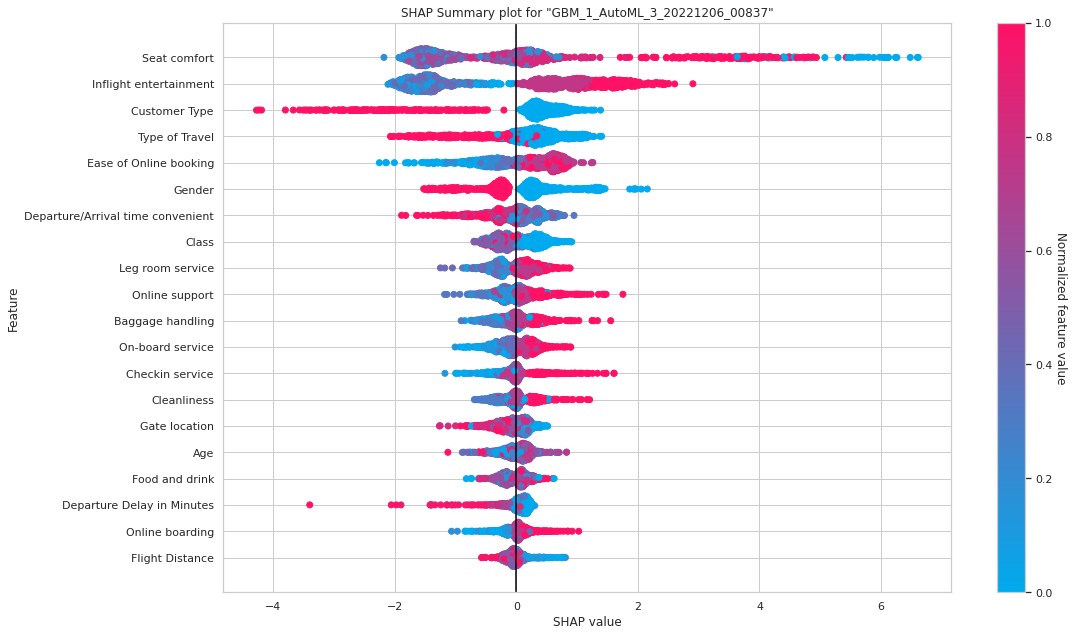

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

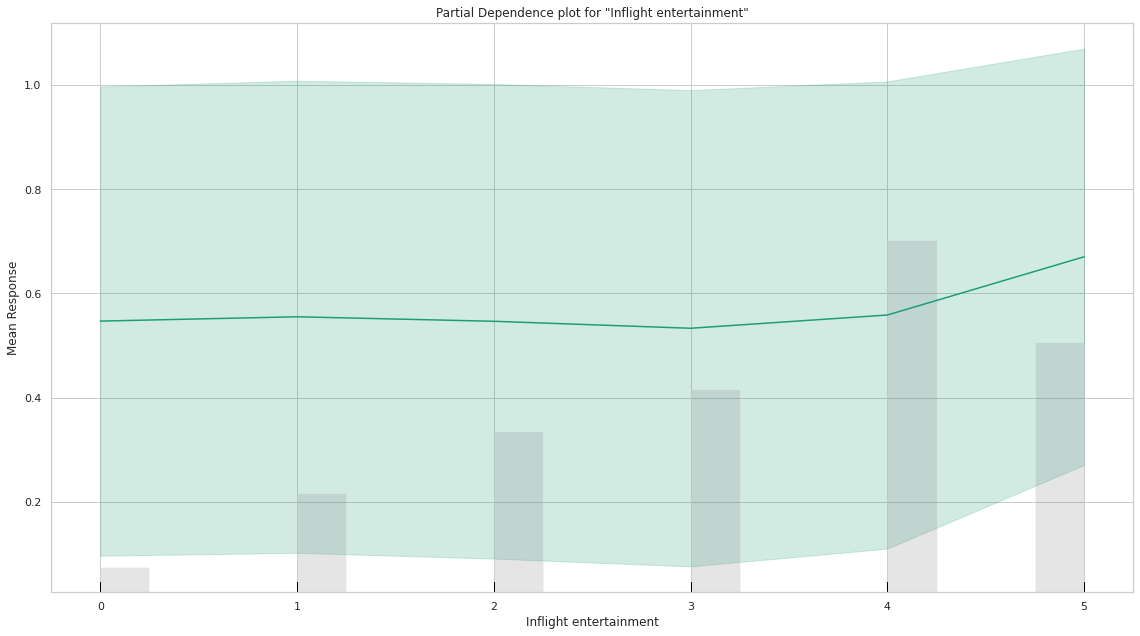

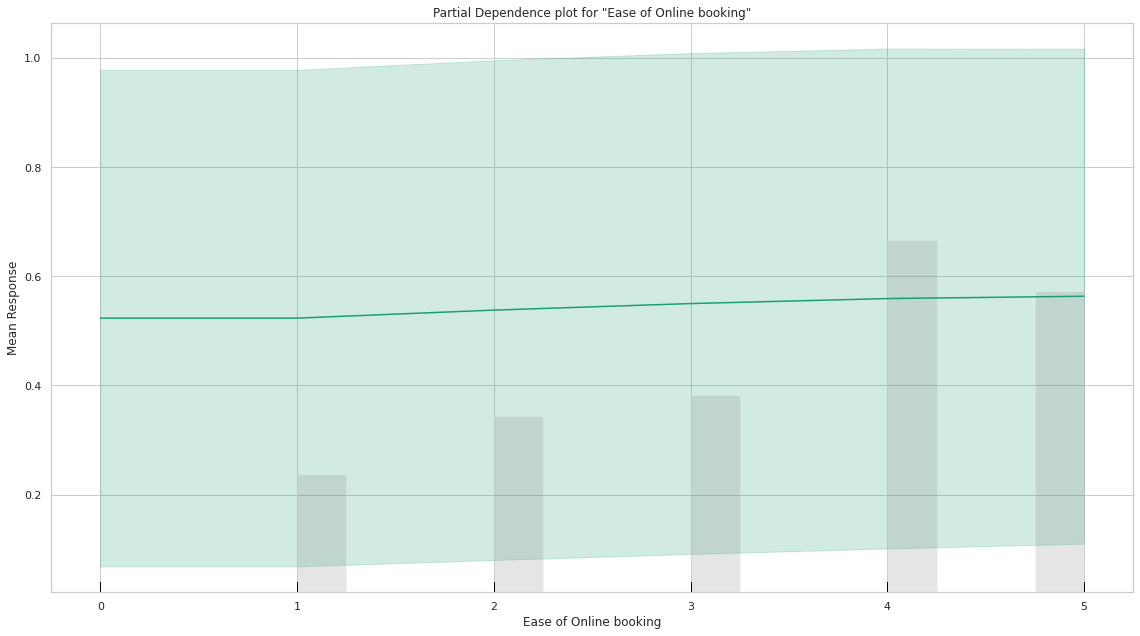

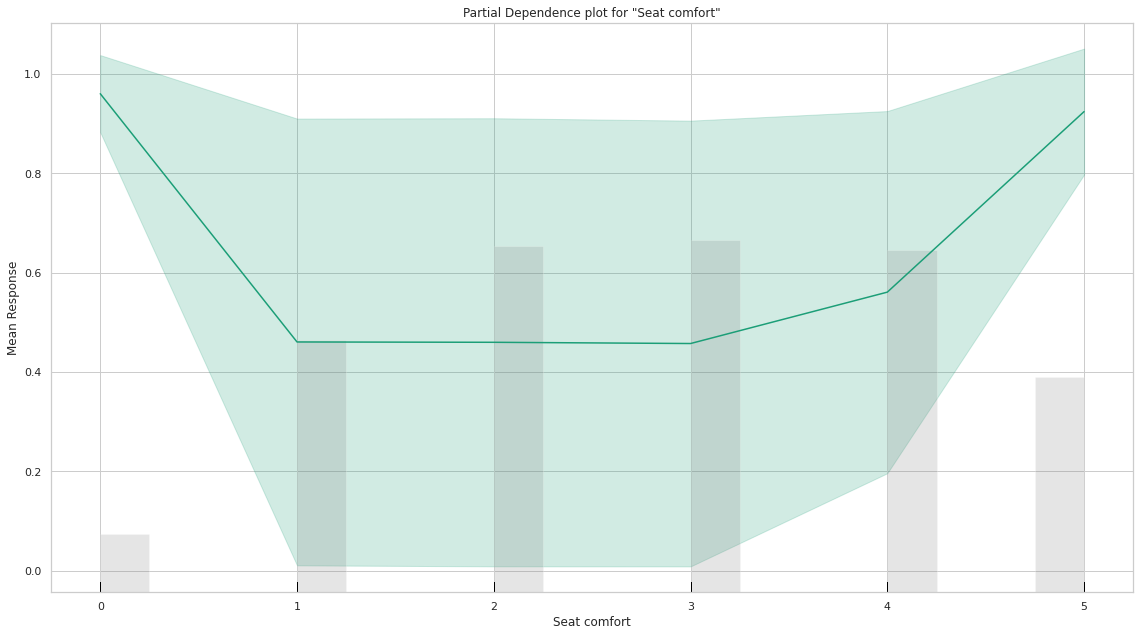

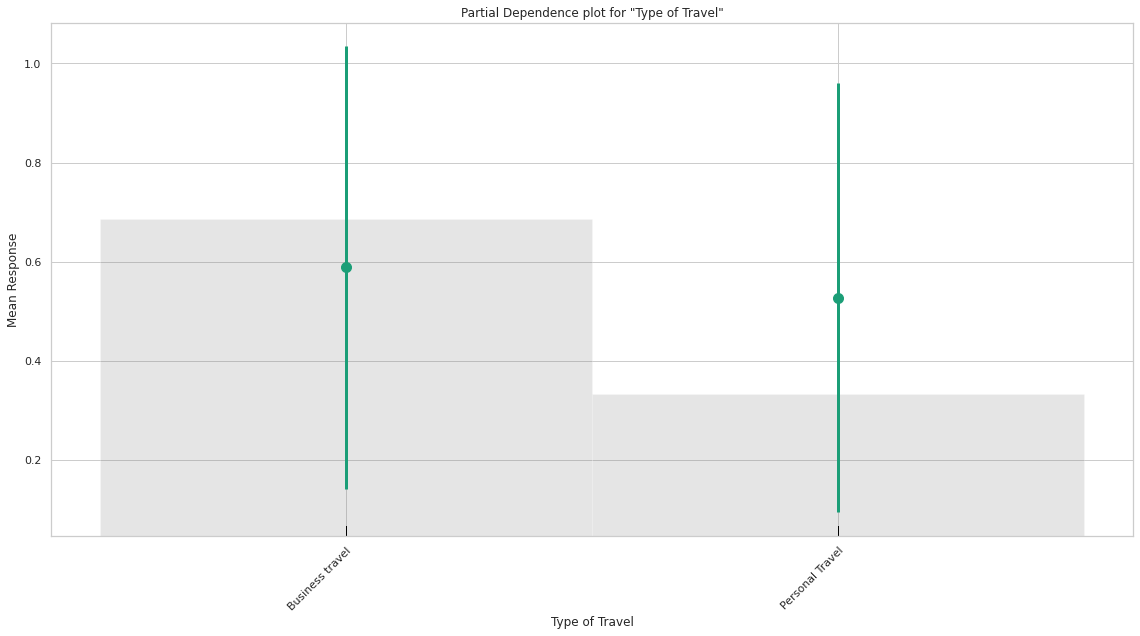

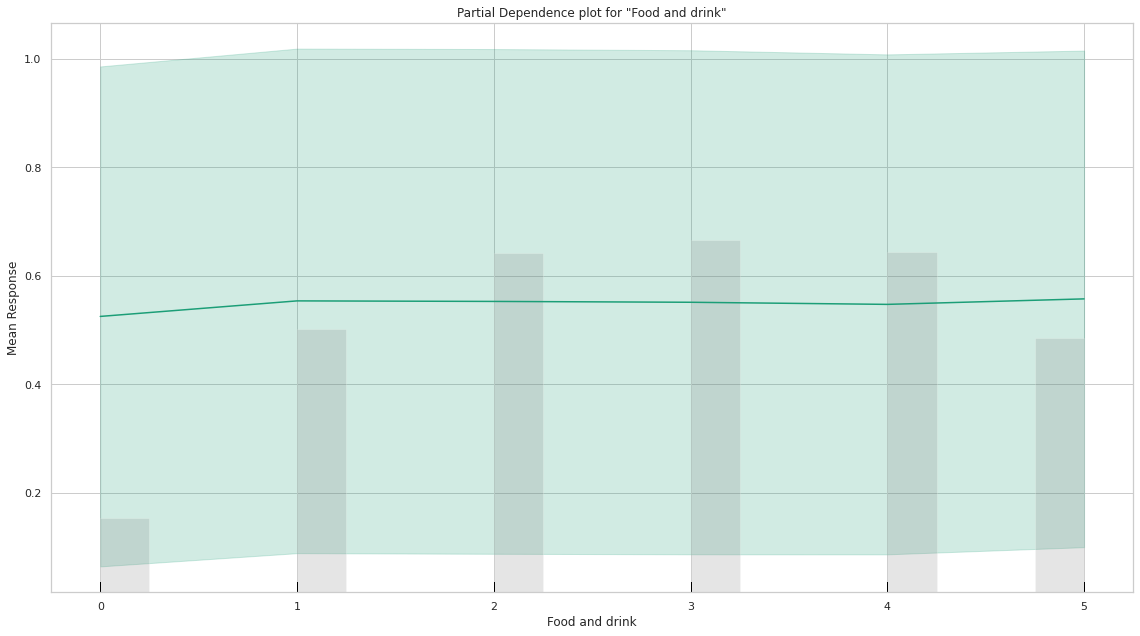

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_3_20221206_00837

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.436362948882846
              dissatisfied    satisfied    Error    Rate
------------  --------------  -----------  -------  -----------------
dissatisfied  57087           1706         0.029    (1706.0/58793.0)
satisfied     1806            69281        0.0254   (1806.0/71087.0)
Total         58893           70987        0.027    (3512.0/129880.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
aml.leader.explain(data)

<div class="alert alert-block alert-info">
<b>Observation:</b>
<br>
  - By looking and analysing the feature importance produced by all the three models, the most important variables are: Inflight Entertainment, Ease of Online booking, seat comfort, Type of travel, Food and Drink<br>

- The Best model interpreted by AutoML is "GBM"<br>

- For Logistic Regression:

Accuracy = 0.8039421004003696

ROC Area under Curve = 0.800383954922981<br>
- For Decision Tree:

Accuracy = 83.40622112719433

roc_auc_score = 80.0383954922981<br>

- For AutoML:

AUC: 0.9971226495693808<br>

</div>

# Conclusion

After this assignment we can confidently say that SHAP is a great tool as it offers high interpretibility. As a solution to the difficulties of explaining machine learning, SHAP analysis can help engineers understand the effect of the inputs of the model and give further insights into the systems they are building, making it another valuable tool in the engineer’s toolbox

SHAP analysis can be applied to the data from any machine learning model. It gives an indication of the relationships that combine to create the model’s output and you can gain real insights into the relationships

By plotting various plots like summary plots, force plots, dependence plots for all the three models we got deeper insights about the data.

# Refernces
1. Sckit learn offcial documentation
2. Refered Towards Data Science
  
  The algorithms were referred directly from the Sckit learn official documentation. The remaining code was written independently. Feature Engineering reference is taken from sklearn offical documnetation

3. https://towardsdatascience.com/explaining-scikit-learn-models-with-shap-61daff21b12a
4. https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b
5. https://www.datacamp.com/tutorial/decision-tree-classification-python
6. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

Copyright 2022 Shivani Shekhawat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.